In [2]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
## READ CSV FILE
df=pd.read_csv(r'C:\Users\saksh\Downloads\Python_Diwali_Sales_Analysis-main\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv', encoding='unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.shape

(11251, 15)

In [7]:
##CHECK DETAIL
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [10]:
## DELETE EMPTY COLUMN
df.drop(['Status','unnamed1'], axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [12]:
##CHECK NULL VALUES
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [13]:
df.shape

(11251, 13)

In [14]:
## DROP NULL VALUES
df.dropna(inplace=True)

In [15]:
df.shape

(11239, 13)

In [16]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [19]:

## CHANGE DATA_TYPE
df['Amount']=df['Amount'].astype(int)

In [20]:
df['Amount'].dtype

dtype('int32')

In [23]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [24]:
df[['Age','Amount','Orders']].describe()

,Age,Amount,Orders
count,11239.000000,11239.000000,11239.000000
mean,35.410357,9453.610553,2.489634
std,12.753866,5222.355168,1.114967
min,12.000000,188.000000,1.000000
25%,27.000000,5443.000000,2.000000
50%,33.000000,8109.000000,2.000000
75%,43.000000,12675.000000,3.000000
max,92.000000,23952.000000,4.000000


##Exploatory data Analysis


# 1.Gender




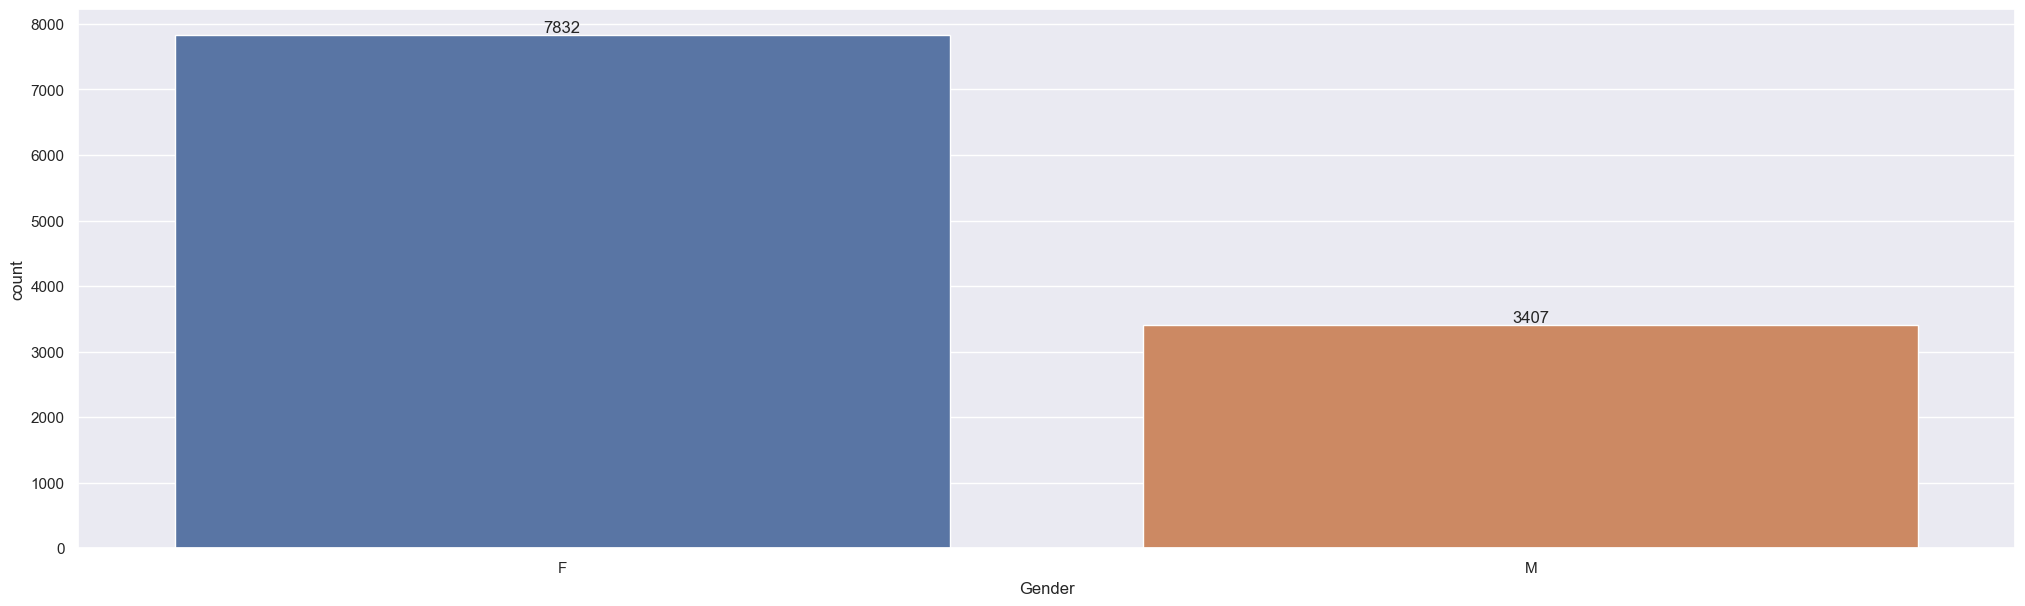

In [81]:
##COUNT MALE AND FEMALE BUYERES

ax=sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [30]:
##FIND BASIS OF GENDER WHO SPEND MORE AMOUNT FOR PURCHASING
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

In [32]:
sales_gen

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

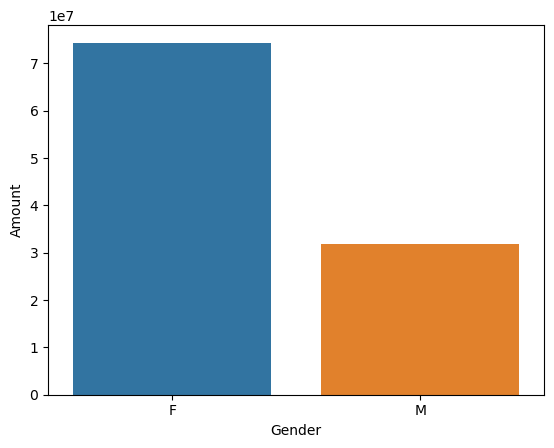

In [36]:
sns.barplot(x='Gender',y='Amount' ,data=sales_gen)


In [37]:

df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# 2. Age Group

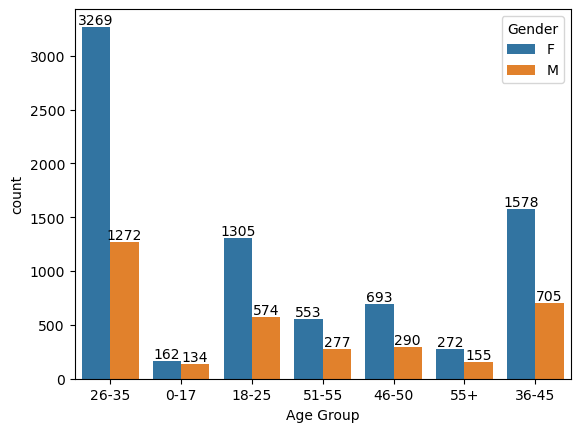

In [39]:
#COUNT AGE GROUP
ax=sns.countplot(x='Age Group',data=df,hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

In [40]:
## FIND PURCHASING POWER BY AGE GROUP
sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum() .sort_values(by='Amount', ascending=False)

In [41]:
sales_age

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<Axes: xlabel='Age Group', ylabel='Amount'>

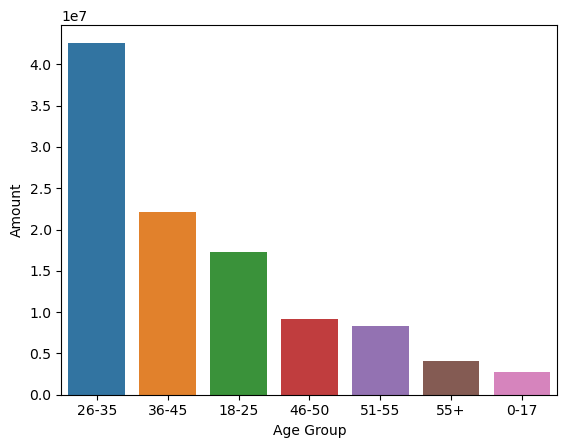

In [43]:
sns.barplot(x='Age Group',y='Amount',data=sales_age)

# 3.State

In [82]:
## TOTAL NUMBER OF ORDER BY TOP 5 STATE
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(5)
sales_state


,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252


<Axes: xlabel='State', ylabel='Orders'>

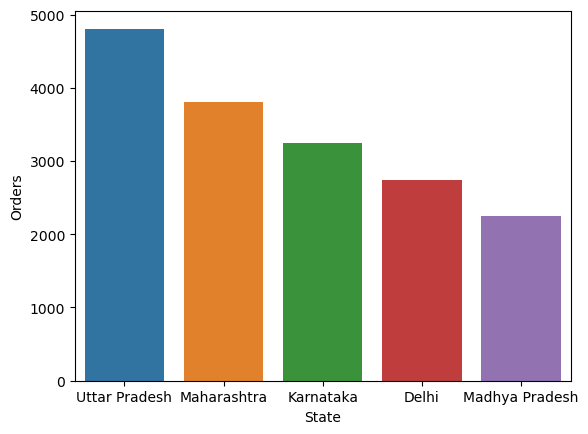

In [52]:
sns.barplot(x='State',y='Orders',data=sales_state)

In [54]:
##TOP 5 STATE WHO SPEND HIGHEST AMOUNT
sales_state1=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(5)

In [57]:
sales_state1

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142


<Axes: xlabel='State', ylabel='Amount'>

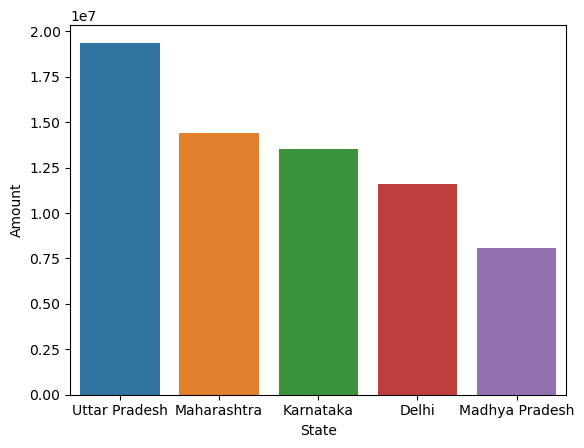

In [58]:
sns.barplot(x='State',y='Amount',data=sales_state1)

# 4. Marital Status 

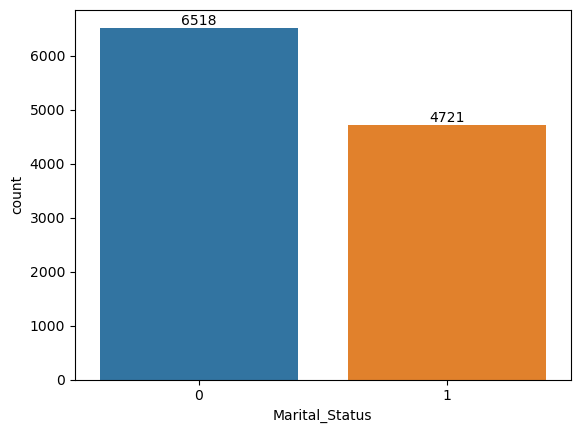

In [62]:

#COUNT MARITAL STATUS
ax=sns.countplot(x='Marital_Status',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [66]:
sales_marriage=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

In [64]:
sales_marriage

,Marital_Status,Amount
0,0,62125384
1,1,44123745


<Axes: xlabel='Marital_Status', ylabel='Amount'>

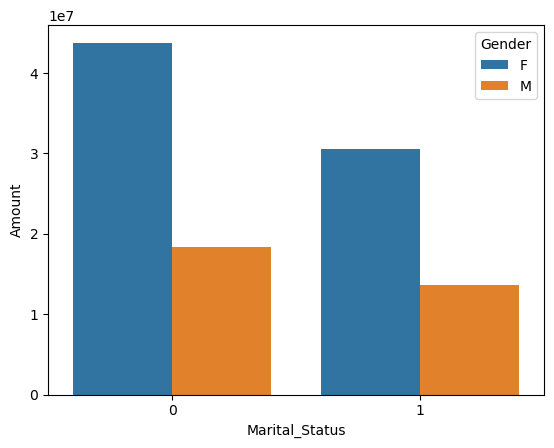

In [67]:
sns.barplot(x='Marital_Status',y='Amount',data=sales_marriage,hue='Gender')

# 5.Occupation

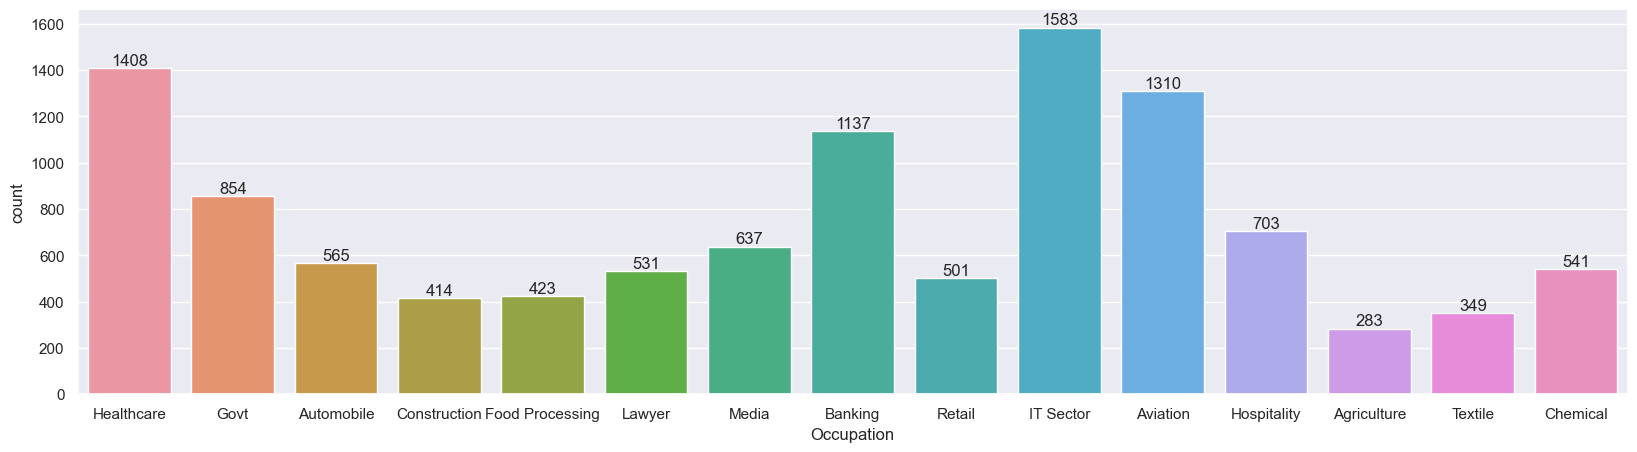

In [71]:
#COUNT OF OCCUPATION
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(x='Occupation',data=df)
for bars in ax.containers:
    ax.bar_label(bars)


In [72]:
##FIND TOP 5 OCCUPATION BY AMOUNT
sales_occu=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(5)
sales_occu

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212


<Axes: xlabel='Occupation', ylabel='Amount'>

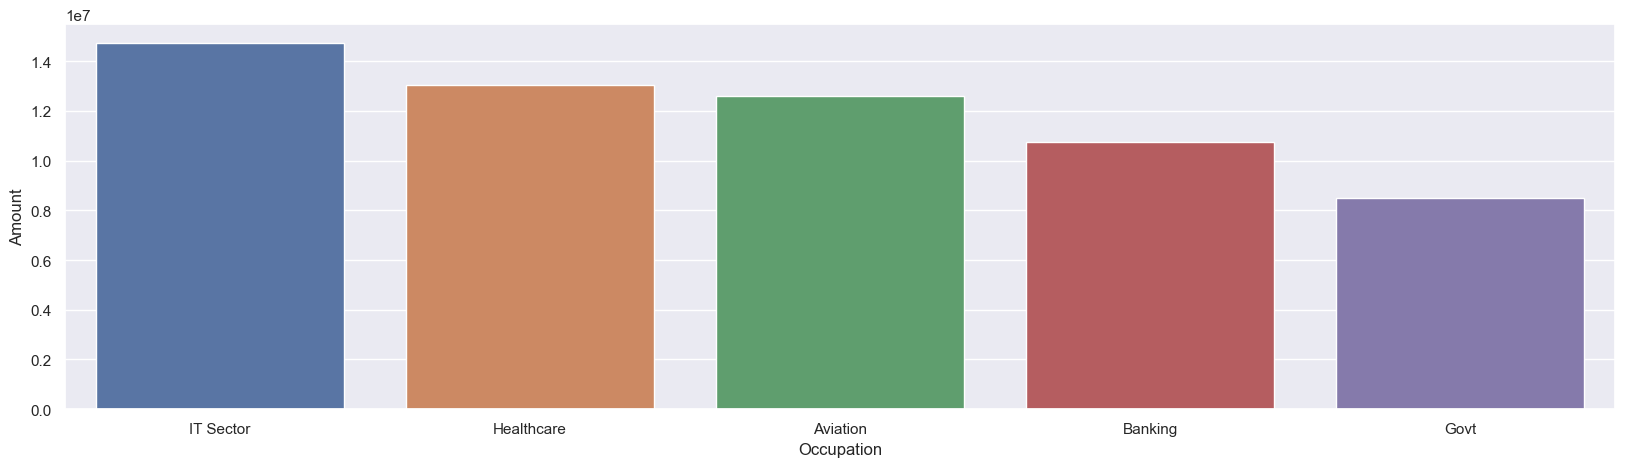

In [73]:
sns.barplot(x='Occupation',y='Amount',data=sales_occu)

# 6.Product Category

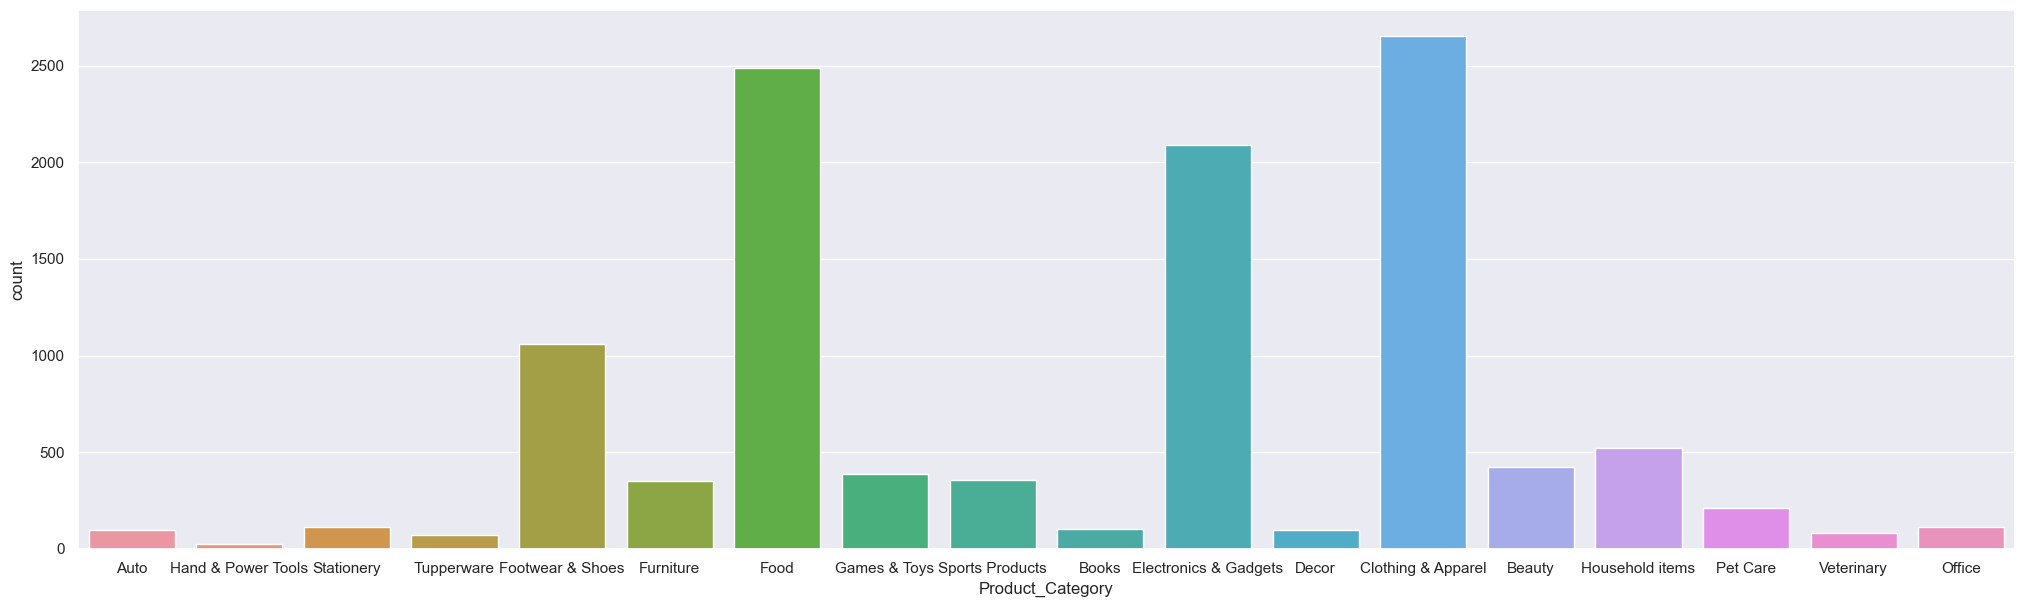

In [77]:
# COUNT PRODUCT
sns.set(rc={'figure.figsize':(25,7)})
ax=sns.countplot(x='Product_Category',data=df)

In [79]:
sales_product=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(5)
sales_product

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051


<Axes: xlabel='Product_Category', ylabel='Amount'>

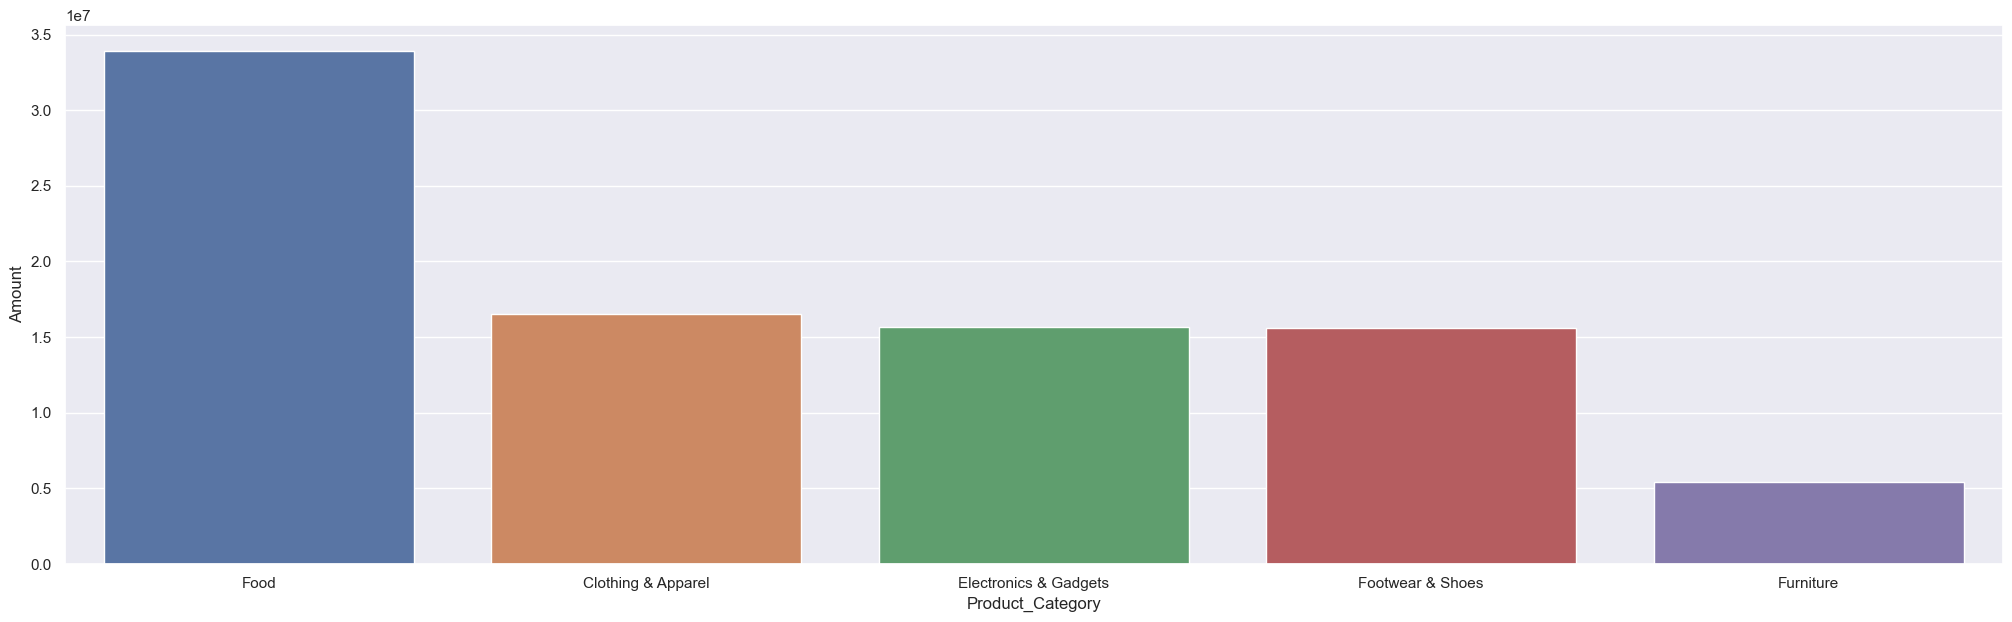

In [80]:
sns.barplot(x='Product_Category',y='Amount',data=sales_product)

# Conclusion

Married women age group 25-35 years from U.P,Maharashtra,Karnatka working in IT,Healthcare and Aviation are more likely to but products from foods ,clothing and electronics category